In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROJECT_PATH = 'data_ite_v1.csv'

In [4]:
dataset = pd.read_csv(PROJECT_PATH)
dataset = dataset.drop(['Unnamed: 0','QuestionNumber','Participant','Brand','Participant_Stimuli','ResponseCode'], axis=1)
dataset.head()

,Brand_First_Char,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,...,Oxy_Op7,Oxy_Op8,Oxy_Op9,Oxy_Op10,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16
0,N,-0.262598,-0.619927,-0.248286,-0.006671,-0.017983,-0.173565,-0.043622,-0.091076,0.105359,...,0.073413,0.095273,0.046544,0.055122,0.102596,-0.036309,-0.035766,0.008657,-0.000563,-0.490804
1,N,-0.395267,0.001335,-0.578758,-0.006755,-0.500375,-0.545892,-0.413575,-0.285942,-0.250314,...,-0.493665,-0.123367,-0.321700,-0.286262,-0.640002,-0.505478,-1.251273,-0.606763,-0.715185,-0.271742
2,N,-0.315036,0.000858,-0.277996,-0.006723,0.000567,-0.004692,-0.014951,0.022559,-0.056654,...,0.065354,0.219873,-0.002850,0.065340,-0.025291,-0.010906,-0.035855,-0.549660,-0.549899,-0.453857
3,N,-0.313166,-0.153458,-0.214679,-0.006712,0.115662,0.073968,0.142529,0.136461,0.170168,...,0.298825,0.372833,0.355605,0.616326,0.526357,0.527409,0.122733,-0.265508,-0.108831,-0.312787
4,N,0.089333,-0.018636,0.058641,-0.006613,-0.003365,0.009435,0.013813,0.007992,0.021373,...,-0.005889,-0.002794,-0.055797,0.085864,-0.011880,0.130017,0.186452,-0.063011,-0.033269,-0.157341


In [5]:
X = dataset.drop(['Brand_First_Char'], axis=1)
y = dataset['Brand_First_Char']

In [6]:
X['sum_Hbo'] =  X.loc[:, 'Hbo_Op1': 'Hbo_Op16'].sum(axis=1)
X['sum_Hbr'] =  X.loc[:, 'Hbr_Op1': 'Hbr_Op16'].sum(axis=1)
X['sum_Hbt'] =  X.loc[:, 'Hbt_Op1': 'Hbt_Op16'].sum(axis=1)
X['sum_Oxy'] =  X.loc[:, 'Oxy_Op1': 'Oxy_Op16'].sum(axis=1)

In [7]:
X.columns

Index(['Hbo_Op1', 'Hbo_Op2', 'Hbo_Op3', 'Hbo_Op4', 'Hbo_Op5', 'Hbo_Op6',
       'Hbo_Op7', 'Hbo_Op8', 'Hbo_Op9', 'Hbo_Op10', 'Hbo_Op11', 'Hbo_Op12',
       'Hbo_Op13', 'Hbo_Op14', 'Hbo_Op15', 'Hbo_Op16', 'Hbr_Op1', 'Hbr_Op2',
       'Hbr_Op3', 'Hbr_Op4', 'Hbr_Op5', 'Hbr_Op6', 'Hbr_Op7', 'Hbr_Op8',
       'Hbr_Op9', 'Hbr_Op10', 'Hbr_Op11', 'Hbr_Op12', 'Hbr_Op13', 'Hbr_Op14',
       'Hbr_Op15', 'Hbr_Op16', 'Hbt_Op1', 'Hbt_Op2', 'Hbt_Op3', 'Hbt_Op4',
       'Hbt_Op5', 'Hbt_Op6', 'Hbt_Op7', 'Hbt_Op8', 'Hbt_Op9', 'Hbt_Op10',
       'Hbt_Op11', 'Hbt_Op12', 'Hbt_Op13', 'Hbt_Op14', 'Hbt_Op15', 'Hbt_Op16',
       'Oxy_Op1', 'Oxy_Op2', 'Oxy_Op3', 'Oxy_Op4', 'Oxy_Op5', 'Oxy_Op6',
       'Oxy_Op7', 'Oxy_Op8', 'Oxy_Op9', 'Oxy_Op10', 'Oxy_Op11', 'Oxy_Op12',
       'Oxy_Op13', 'Oxy_Op14', 'Oxy_Op15', 'Oxy_Op16', 'sum_Hbo', 'sum_Hbr',
       'sum_Hbt', 'sum_Oxy'],
      dtype='object')

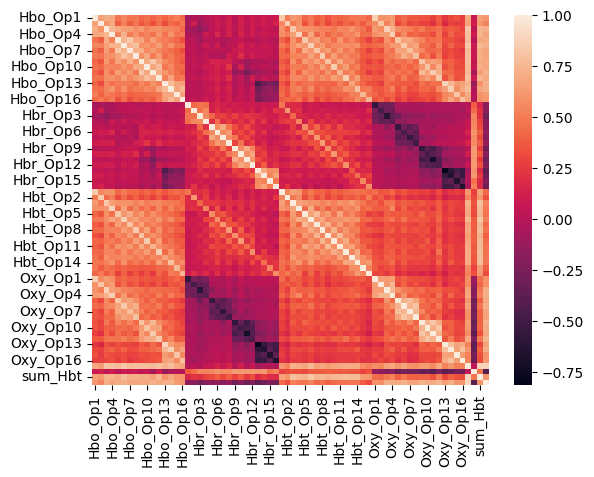

In [8]:
sns.heatmap(pd.DataFrame(X).corr())
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train Test Split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Standard Scaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [15]:
scaled_df = pd.DataFrame(Xtrain_scaled, columns = X.columns)
scaled_df.head()

,Hbo_Op1,Hbo_Op2,Hbo_Op3,Hbo_Op4,Hbo_Op5,Hbo_Op6,Hbo_Op7,Hbo_Op8,Hbo_Op9,Hbo_Op10,...,Oxy_Op11,Oxy_Op12,Oxy_Op13,Oxy_Op14,Oxy_Op15,Oxy_Op16,sum_Hbo,sum_Hbr,sum_Hbt,sum_Oxy
0,-1.776161,-2.053333,-1.875134,-1.231261,-1.849703,-2.234118,-1.719632,-1.363498,-2.311888,-1.897975,...,-1.396707,-2.283046,-1.388528,-1.903784,-1.271191,-0.662882,-2.533320,0.237931,-2.112752,-2.396195
1,0.013548,-0.102743,-0.262490,-0.278298,-0.384308,-0.900896,-0.831991,-1.281766,-0.150167,-1.069292,...,1.724257,-0.288222,0.686301,0.271971,0.012391,0.002814,-0.482659,-0.875057,-0.818217,-0.028703
2,0.013515,0.192006,-0.022309,-0.231605,0.233090,0.852206,1.185972,1.582665,0.917487,0.683477,...,0.257907,0.344192,0.743925,0.447148,1.047499,0.834538,0.914081,0.527462,1.039337,0.579324
3,-0.565626,-0.482875,-1.003307,-1.658148,-1.061701,-2.051237,-0.562221,-0.788678,0.880847,0.128501,...,0.396402,-0.116925,1.530004,0.924883,0.551337,2.726017,-0.335713,-2.085517,-1.236097,0.666612
4,0.204950,0.003109,0.208064,0.280557,0.665538,0.585323,0.308734,1.096009,0.775357,0.295104,...,1.055772,1.097297,1.312754,1.750804,0.029914,0.025746,0.585612,-1.454786,-0.143855,1.204969


In [16]:
from sklearn.decomposition import PCA

In [17]:
# PCA
pca = PCA(n_components = 0.95)
Xtrain_pca = pca.fit_transform(Xtrain_scaled)
Xtest_pca = pca.transform(Xtest_scaled)

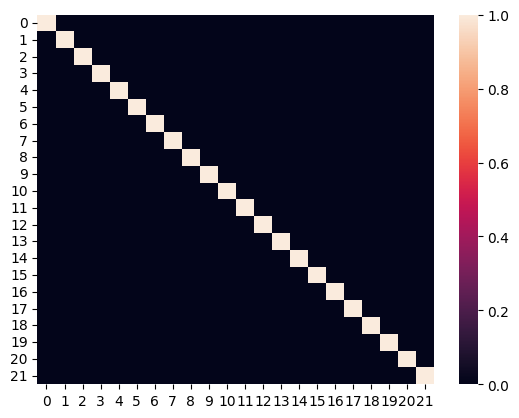

In [18]:
sns.heatmap(pd.DataFrame(Xtrain_pca).corr())
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier

In [20]:
# Grid Search for Random Forest Classifier
RFC = RandomForestClassifier()

paramsRF = {
    'n_estimators':[50, 100, 500, 1000],
    'max_depth': [10, 20, 30]
}

gridRFR = GridSearchCV(estimator = RFC, param_grid = paramsRF, cv = 5, verbose = 3, refit = True, n_jobs = -1)

gridRFR.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=3)

In [21]:
best_params = gridRFR.best_params_
print(best_params)

{'max_depth': 10, 'n_estimators': 50}


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
prediction = gridRFR.predict(Xtest_scaled)

In [24]:
print(classification_report(ytest, prediction))
print(confusion_matrix(ytest, prediction, labels = ['N', 'R', 'P']))

              precision    recall  f1-score   support

           N       0.52      0.50      0.51       375
           P       0.50      0.61      0.55       368
           R       0.38      0.32      0.35       382

    accuracy                           0.47      1125
   macro avg       0.47      0.47      0.47      1125
weighted avg       0.47      0.47      0.47      1125

[[186 110  79]
 [115 121 146]
 [ 58  86 224]]
